In [9]:
from xgboost import XGBRegressor
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

 
usable_data_folder = Path(r"C:\Users\Flin\OneDrive - TU Eindhoven\Flin\Flin\01 - Uni\00_Internship\Nokia\00_Programming\forecasting\datasets\train")
fn = r"residential_no_pv\h=2_residential_2018_NO_PV_SFH3_2018.csv"  
path = usable_data_folder / fn

df = pd.read_csv(path)
TINY_TEST = False

In [10]:
def X_and_y(df):
    y = df["y"].values
    X = df.drop(columns=["datetimes", "y"]).to_numpy()

    return X, y

In [11]:
if TINY_TEST:
    df = df.iloc[:1000]

F = 0.75
n = int(len(df)*F)

df_train = df.iloc[:n]
df_test = df.iloc[n:]

train_X, train_y = X_and_y(df_train)
test_X, test_y = X_and_y(df_test)

In [18]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 | 

In [39]:
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1)

In [40]:
model.fit(X=train_X, y=train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [41]:
yhat_train = model.predict(X=train_X)
yhat_test = model.predict(X=test_X)

yhat = list(yhat_train) + list(yhat_test)

y = list(train_y) + list(test_y)

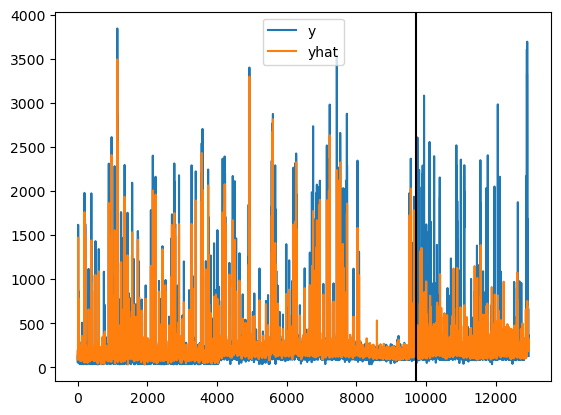

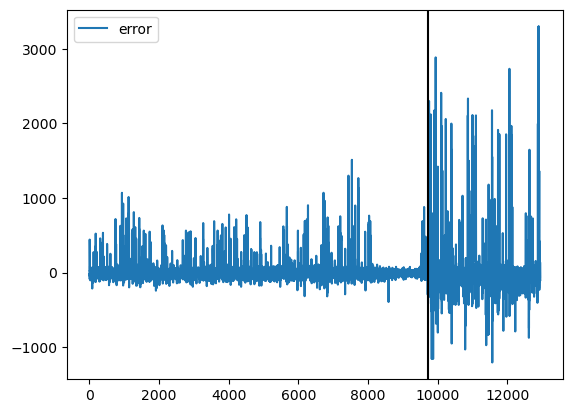

In [42]:
plt.plot(y, label="y")
plt.plot(yhat, label="yhat")
plt.axvline(x=n, color="black")
plt.legend()
plt.show()

assert len(y) == len(yhat)
d = [_y - _yh for _y, _yh in zip(y, yhat)]
plt.plot(d, label="error")

plt.axvline(x=n, color="black")
plt.legend()

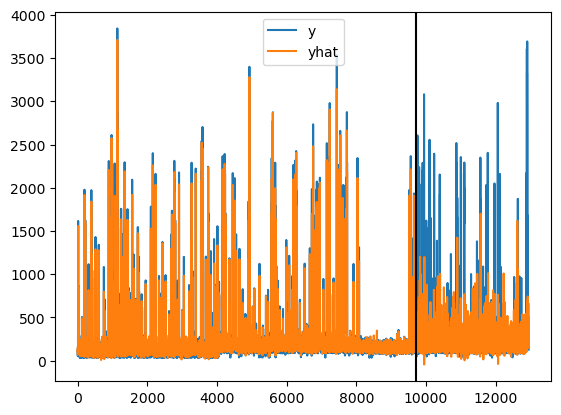

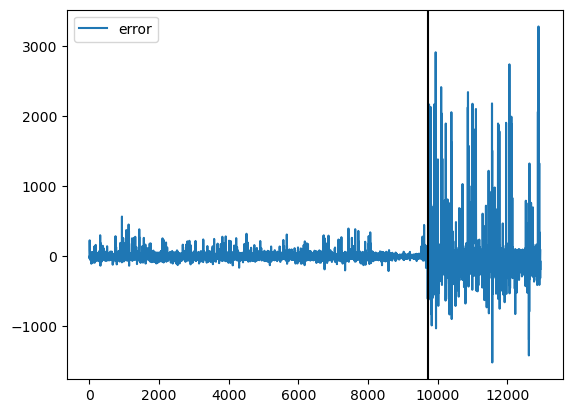

In [30]:

plt.plot(y, label="y")
plt.plot(yhat, label="yhat")
plt.axvline(x=n, color="black")
plt.legend()
plt.show()

assert len(y) == len(yhat)
d = [_y - _yh for _y, _yh in zip(y, yhat)]
plt.plot(d, label="error")

plt.axvline(x=n, color="black")
plt.legend()


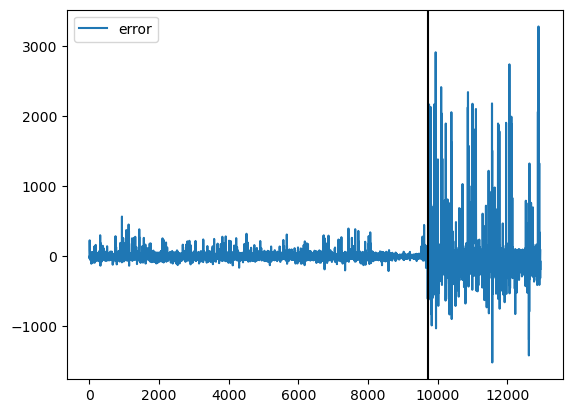